# Neurometría vs Psicofísica


En estas notas se realizarán análisis de la neurometría contra la psicofísica mediante el uso de la sensibilidad d prima d'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 12, 'font.weight':'bold', 'font.style':'normal'})


sA=np.loadtxt('/run/media/sparra/AENHA/Drive_sparra/Prpy/sensitivity_A1_RR032.csv', dtype=float)
sT=np.loadtxt('/run/media/sparra/AENHA/Drive_sparra/Prpy/sensitivity_S1_RR032.csv', dtype=float)
plt.figure(1, figsize=(15, 9))
ax1=plt.subplot(1, 2, 1)
ax2=plt.subplot(1, 2, 2)
ax1.plot(sA[:, 4], sA[:, 6], 'k*' )
ax1.plot(sT[:, 4], sT[:, 6], 'k*' )
ax1.set_xlabel('Sensitivity for Tactile stimuli d´', fontsize=12, fontweight='bold')
ax1.set_ylabel('Sensitivity for Acoustic stimuli d´', fontsize=12, fontweight='bold')
x=np.arange(1.1, 3.5, 0.01)
ax1.plot(x, x, c='red', label='equal sensitivity')
ax1.legend(loc='best', fontsize=8, frameon=False)
ax1.grid(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#Proportion of rewards
ax2.plot(sA[:, 8], sA[:, 10], 'k*' )
ax2.plot(sT[:, 8], sT[:, 10], 'k*' )
ax2.set_xlabel('Proportion of Hits for Tactile flutter', fontsize=12, fontweight='bold')
ax2.set_ylabel('Proportion of Hits for Acoustic flutter', fontsize=12, fontweight='bold')
x=np.arange(0, 1, 0.01)
ax2.plot(x, x, c='red', label='equality')
ax2.legend(loc='best', fontsize=8, frameon=False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True)


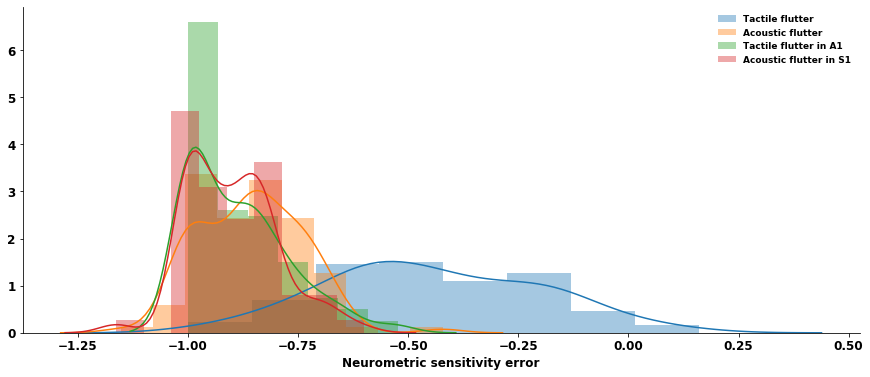

In [3]:
dA=np.divide(sA[:, 7]-sA[:,6], sA[:, 6])
dT=np.divide(sT[:, 5]-sT[:,4], sT[:, 4])
plt.figure(2, figsize=(15, 6))
ax3=plt.subplot(1, 1, 1)
sns.distplot(dT, label='Tactile flutter');
#ax3.hist(dT, label='Tactile flutter')
sns.distplot(dA, label='Acoustic flutter')
ax3.set_xlabel('Neurometric sensitivity error', fontsize=12, fontweight='bold')
ax3.legend(loc='best', fontsize=8)


sns.distplot(np.divide(sA[:, 5]-sA[:,4], sA[:, 4]), label='Tactile flutter in A1')
sns.distplot(np.divide(sT[:, 7]-sT[:,6], sT[:, 6]), label='Acoustic flutter in S1')
ax3.set_xlabel('Neurometric sensitivity error', fontsize=12, fontweight='bold')
ax3.legend(loc='best', fontsize=9, frameon=False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

La neurometría del estímulo acústico en la corteza auditiva primaria no está mostrando codificación del estímulo, esto se puede ver en el error relativo de la sensibilidad comparada con la psicofísica. Es posible notar también que dicha neurometría es equivalente a las obtenidas para el estímulo en la corteza de otra modalidad.


Por otro lado, la neurometría es en general, peor que el de la psicofísica. O al menos esa es la conclusión con la métrica d prima $d^{'}$


Es posible determinar que las neuronas que tienen una baja codificación del estímulo tienen un error relativo mayor al -0.625. 


No obstante, también es necesario buscar por aquellos casos en los que el performance del mono se encuentre fuera del rango óptimo (lo que sea que esto signifique hasta el momento)

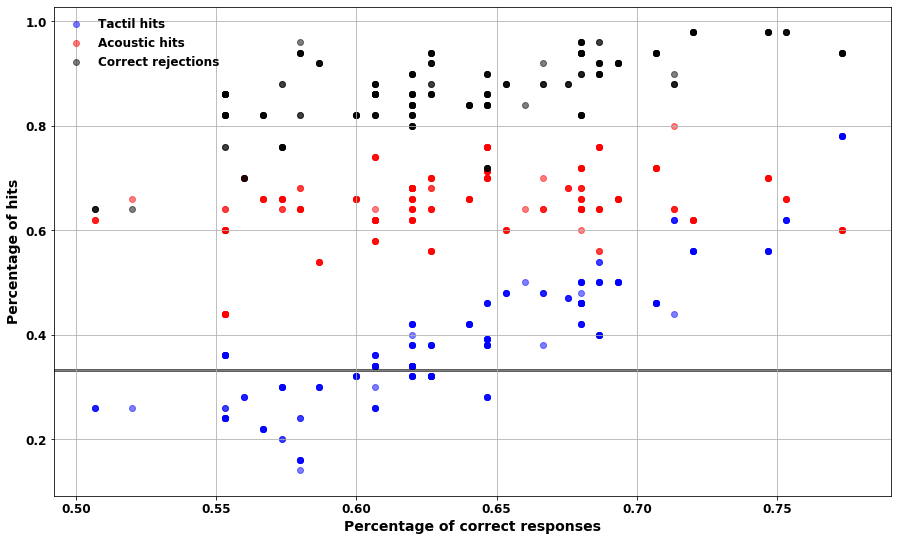

In [4]:
plt.figure(3, figsize=(15, 9))
plt.scatter(sT[:, 14], sT[:, 8], c='blue', alpha=0.5, label='Tactil hits')
plt.scatter(sA[:, 14], sA[:, 8], c='blue', alpha=0.5 )
plt.scatter(sT[:, 14], sT[:, 10], c='red', alpha=0.5, label='Acoustic hits')
plt.scatter(sA[:, 14], sA[:, 10], c='red', alpha=0.5)
plt.scatter(sT[:, 14], sT[:, 12], c='black', alpha=0.5, label='Correct rejections')
plt.scatter(sA[:, 14], sA[:, 12], c='black', alpha=0.5)
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Percentage of correct responses', fontsize=14, fontweight='bold' )
plt.ylabel('Percentage of hits', fontsize=14, fontweight='bold')
plt.grid(True)
#plt.axvspan(xmin=0.33, xmax=0.335, color='black', alpha=0.5)
plt.axhspan(ymin=0.33, ymax=0.335, color='black', alpha=0.5)

Como se puede ver, sólo la modalidad táctil tiene porcentajes de hits menores a la eficiencia por azar. En estos mismos casos el porcentaje de respuestas correctas es menor al 65%. 

La siguientes gráficas muestran los datos separados para obtener una mejor perspectiva de esos días con un porcentaje de aciertos táctiles tan bajo.

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


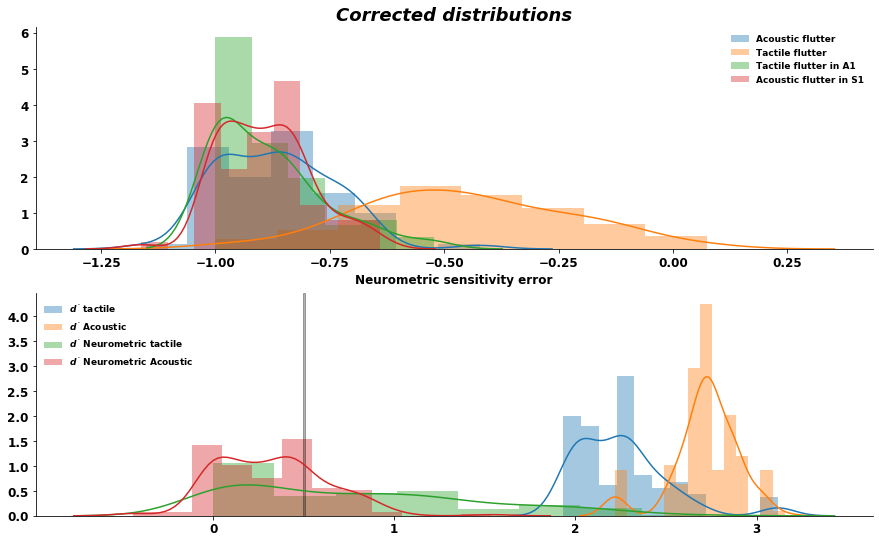

In [5]:
tmp=sA[:, 8]>0.3333
tmp2=sT[:, 8]>0.3333
cdA=np.divide(sA[tmp, 7]-sA[tmp,6], sA[tmp, 6])
cdT=np.divide(sT[tmp2, 5]-sT[tmp2,4], sT[tmp2, 4])
plt.figure(4, figsize=(15, 9))
ax4=plt.subplot(2, 1, 1)
sns.distplot(cdA, label='Acoustic flutter')
sns.distplot(cdT, label='Tactile flutter')
ax4.set_xlabel('Neurometric sensitivity error', fontsize=12, fontweight='bold')
ax4.legend(loc='best', fontsize=8)


sns.distplot(np.divide(sA[tmp, 5]-sA[tmp,4], sA[tmp, 4]), label='Tactile flutter in A1')
sns.distplot(np.divide(sT[tmp2, 7]-sT[tmp2,6], sT[tmp2, 6]), label='Acoustic flutter in S1')
ax4.set_xlabel('Neurometric sensitivity error', fontsize=12, fontweight='bold')
ax4.legend(loc='best', fontsize=9, frameon=False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_title('Corrected distributions', fontsize=18, fontweight='bold', fontstyle='italic')

sAp=(sA[tmp, 4]) #Selecting elements
sTp=(sT[tmp2,4]) #Selecting elements        
PsicTac=np.concatenate((sAp, sTp))
sAp=(sA[tmp, 6]) #Selecting elements
sTp=(sT[tmp2, 6]) #Selecting elements        
PsicAc =np.concatenate((sAp, sTp))
ax5=plt.subplot(2, 1, 2)
sns.distplot(PsicTac, label='$d^{´}$ tactile')
sns.distplot(PsicAc, label='$d^{´}$ Acoustic')
ax5.legend(loc='best', fontsize=9, frameon=False)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
#Now neurometric dprimes
sAp=(sA[tmp, 5]) #Selecting elements
sTp=(sT[tmp2,5]) #Selecting elements        
PsicTac=np.concatenate((sAp, sTp))
sAp=(sA[tmp, 7]) #Selecting elements
sTp=(sT[tmp2, 7]) #Selecting elements        
PsicAc =np.concatenate((sAp, sTp))
ax5=plt.subplot(2, 1, 2)
sns.distplot(PsicTac, label='$d^{´}$ Neurometric tactile')
sns.distplot(PsicAc, label='$d^{´}$ Neurometric Acoustic')
ax5.legend(loc='best', fontsize=9, frameon=False)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.axvspan(xmin=0.497, xmax=0.505, color='black', alpha=0.3)


Por otro lado, las eficiencias bajas en el reconocimiento del estímulo táctil pueden también estar asociadas a una alta tasa de rechazos correctos, ¿cómo es la distribución de la sensibilidad psicofísica para estos casos?

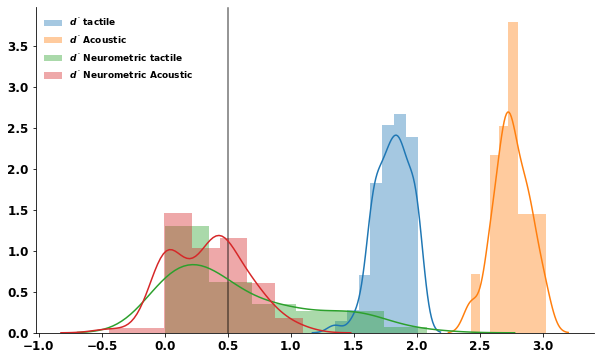

In [6]:
sAp=(sA[~tmp, 4]) #Selecting elements
sTp=(sT[~tmp2,4]) #Selecting elements        
PsicTac=np.concatenate((sAp, sTp))
sAp=(sA[~tmp, 6]) #Selecting elements
sTp=(sT[~tmp2, 6]) #Selecting elements        
PsicAc =np.concatenate((sAp, sTp))
plt.figure(5, figsize=(10, 6))
ax6=plt.subplot(1, 1, 1)
sns.distplot(PsicTac, label='$d^{´}$ tactile')
sns.distplot(PsicAc, label='$d^{´}$ Acoustic')
ax6.legend(loc='best', fontsize=9, frameon=False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
#Now neurometric dprimes
sAp=(sA[~tmp, 5]) #Selecting elements
sTp=(sT[~tmp2,5]) #Selecting elements        
PsicTac=np.concatenate((sAp, sTp))
sAp=(sA[~tmp, 7]) #Selecting elements
sTp=(sT[~tmp2, 7]) #Selecting elements        
PsicAc =np.concatenate((sAp, sTp))
sns.distplot(PsicTac, label='$d^{´}$ Neurometric tactile')
sns.distplot(PsicAc, label='$d^{´}$ Neurometric Acoustic')
ax6.legend(loc='best', fontsize=9, frameon=False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.axvspan(xmin=0.497, xmax=0.505, color='black', alpha=0.3)


# Conclusiones

1. La neurometría para el firing rate, sin importar la modalidad tiene una eficiencia menor que el comportamiento del mono. 

2. La corteza auditiva no muestra una codificación con el firing rate

3. La neurometría auditiva por lo tanto está al nivel de la neurometría con modalidad cruzada.

4. La sensibilidad del mono para los estímulos auditivos es mayor que para los estímulos táctiles

5. **Eliminar los elementos con un porcentaje de aciertos menor al azar por modalidad no es una opción adecuada, ya que pueden estar asociados a un alto porcentaje de rechazos correctos**

6. Encontrar una incertidumbre a la sensibilidad con valores cerca de 0 podría ser la mejor opción. Esta solución se pasa al igual para la neurometría.

No obstante quedan pendientes las siguientes preguntas:

* ¿Cómo elegir la psicofísica con un performance superior al azar? **Calculando bootstrap para encontrar una incertidumbre en la $d^{´}$**

* Elegir las neuronas a analizar se puede hacer mediante los siguientes uno de los dos siguientes métodos (para cada posible codificación):     
    1. validarlas con una prueba de $\chi^2$ de un ajuste lineal, además de una prueba de permutaciones a la pendiente. 
    2. El ajuste lineal podría sustituirse con el cálculo de una correlación de Pearson, el objetivo sería encontrar relaciones significativas con una prueba de bootstrap.
